### Compare results of different experiments

In [1]:
import os, sys
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [8]:
from modules.evalutils import get_dir_nums, get_tbls, param_diffs

In [9]:
nums = get_dir_nums(log_dir='../dbin/')
nums

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [10]:
ret = get_tbls('basicexp', nums, log_dir='../dbin/')

d_metrics, d_resid, d_params = ret

In [25]:
d_params.T.head(6)

,basicexp-0,basicexp-1,basicexp-2,basicexp-3,basicexp-4,basicexp-5,basicexp-6,basicexp-7,basicexp-8,basicexp-9,basicexp-10,basicexp-11,basicexp-12,basicexp-13,basicexp-14,basicexp-15,basicexp-16,basicexp-17
_train_name,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops
_test_name,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy
_train_path,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1
_test_path,../../../other-chess-data/regulation-test-all-2,../../../other-chess-data/regulation-test-all-2,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy
_model_arch,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet18,resnet18,resnet34,resnet34,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50
_fit_one_cycle_epochs,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


##### expbuilder-2: augmentations

In [15]:
base = 'basicexp-'
nums = range(2,8)
exps = [base + str(i) for i in nums]

exp_params = d_params.T[exps]
exp_metrics= d_metrics[d_metrics['exp_name'].isin(exps)]

In [16]:
param_diffs(exp_params)

_train_seed      3
_max_lighting    2
_max_warp        2
_max_rotate      2
model_fn         6
dtype: int64

In [41]:
import warnings
warnings.filterwarnings('ignore')

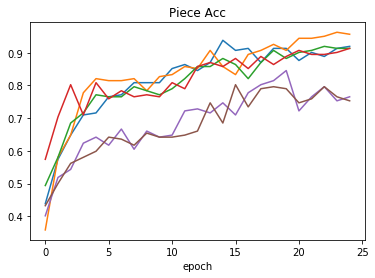

In [45]:
exp_metrics['err'] = exp_metrics['test_subcat_color_acc'].map(
                        lambda x: 1-x)

df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_subcat_piece_acc')

df_agg.T.plot(legend=None, title='Piece Acc')

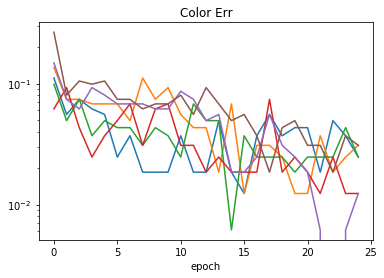

In [46]:
exp_metrics['err'] = exp_metrics['test_subcat_color_acc'].map(
                        lambda x: 1-x)

df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='err')

df_agg.T.plot(legend=None, title='Color Err', logy=True)

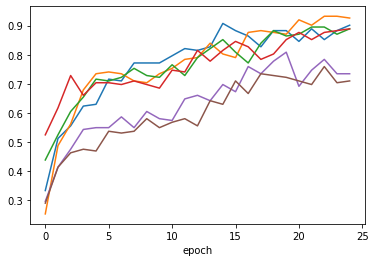

In [28]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_subcat_color_acc')

df_agg.T.plot(legend=None, title='Color Acc')

##### expbuilder-2b: architectures

In [21]:
base = 'basicexp-'
nums = range(8,13+1)
exps = [base + str(i) for i in nums]

exp_params = d_params.T[exps]
exp_metrics= d_metrics[d_metrics['exp_name'].isin(exps)]

In [22]:
param_diffs(exp_params)

_model_arch    3
_train_seed    2
model_fn       6
dtype: int64

In [23]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_accuracy')

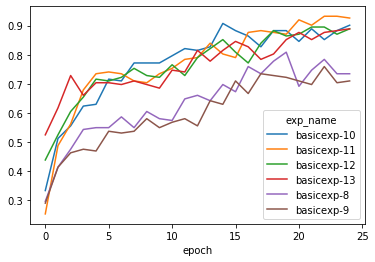

In [88]:
df_agg.T.plot()

In [49]:
d_metrics

,epoch,exp_name,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,test_loss,test_accuracy,test_subcat_color_acc,test_subcat_piece_acc
0,0,basicexp-0,1.963634,0.230670,0.944251,0.994774,0.947735,1.714839,0.434211,0.912281,0.486842
1,1,basicexp-0,1.056753,0.112491,0.980836,0.996516,0.982578,1.721915,0.513158,0.938596,0.570175
2,2,basicexp-0,0.700319,0.096048,0.989547,0.998258,0.991289,1.446282,0.574561,0.934211,0.640351
3,3,basicexp-0,0.489947,0.091698,0.987805,0.996516,0.989547,1.381656,0.644737,0.934211,0.714912
4,4,basicexp-0,0.384009,0.088793,0.989547,0.996516,0.991289,1.347045,0.614035,0.934211,0.692982
...,...,...,...,...,...,...,...,...,...,...,...
20,20,basicexp-17,0.129283,0.084973,0.993031,0.996516,0.996516,0.335765,0.888889,0.981481,0.907407
21,21,basicexp-17,0.107127,0.083386,0.993031,0.996516,0.996516,0.276156,0.907407,0.987654,0.919753
22,22,basicexp-17,0.091741,0.084971,0.993031,0.996516,0.996516,0.261718,0.895062,0.993827,0.907407
23,23,basicexp-17,0.087185,0.084445,0.993031,0.996516,0.996516,0.356565,0.876543,0.987654,0.888889


In [89]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_loss')

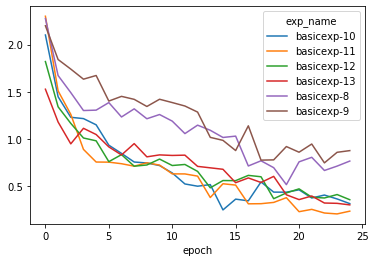

In [90]:
df_agg.T.plot()

##### expbuild-2c: different crop styles

In [98]:
base = 'basicexp-'
nums = range(14,17+1)
exps = [base + str(i) for i in nums]

exp_params = d_params[exps]
exp_metrics= d_metrics[d_metrics['exp_name'].isin(exps)]

param_diffs(exp_params)

_train_seed     2
_custom_crop    2
model_fn        4
dtype: int64

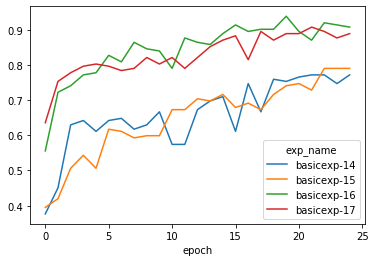

In [99]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_accuracy')

df_agg.T.plot()